# GAMLSS

GAM models for location scale and shape (GAMLSS) facilitate modelling additional
parameters of the response distribution (such as a scale parameter), as a function of the explanatory variables.
Below is a simple 1D example:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create toy dataset
import pandas as pd

from pymgcv.gam import GAM
from pymgcv.plot import plot_gam
from pymgcv.terms import S
from pymgcv.families import GauLSS

rng = np.random.default_rng(0)
x = np.linspace(-1, 1, 100)
data = pd.DataFrame({
    "x": x,
    "y": rng.normal(loc=np.pi*np.sin(4*x), scale=4*np.abs(x) + 0.1),
})

We use the [`GauLSS`][pymgcv.families.GauLSS] family, which supports modelling the log standard deviation

In [2]:
gam = GAM(
    predictors={"y": S("x")},
    family_predictors={"scale": S("x")},
    family=GauLSS(),
)

gam.fit(data=data)
pred = gam.predict(data, compute_se=True)

This gives us a dictionary of targets (response/family parameters) mapping to the fitted values and standard errors, e.g.

In [3]:
pred["y"].fit  # numpy vector predicted y values (link scale).
pred["y"].se  # Associated standard errors. 

pred["scale"].fit  # numpy vector predicted scale values (link scale).
pred["scale"].se;  # Associated standard errors. 

Plotting the partial effects, we can see the model suggests a relationship between $x$ and the response scale

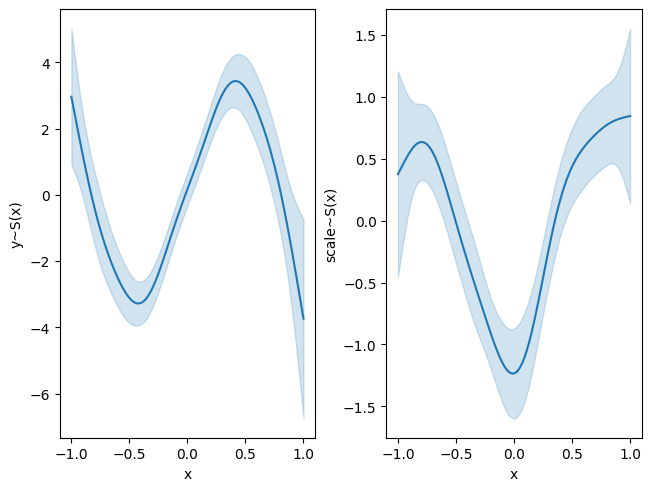

In [4]:
plot_gam(gam)
plt.show()